<a href="https://colab.research.google.com/github/AnnaKraim/ML/blob/main/linear_kr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 1. Простейшая линейная регрессия

Вам дан набор точек X и ответ y.



In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])
y = np.array([ 6.4827918 ,  2.8385399 ,  4.67389768,  4.40522852,  6.76006502,
         6.28925871,  7.88456663,  7.27841165,  8.65990471,  8.51177052,
        10.85354971,  9.92681585, 12.2132877 , 11.82238453, 13.48175422,
        12.66602014, 14.56586813, 14.46685428, 15.96585535, 12.10685302])

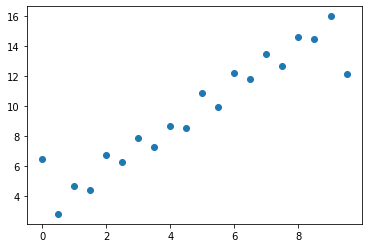

In [ ]:
plt.scatter(x, y)

Самостоятельно найдите коофициенты линейной регрессии для данной задачи с помощью формулы парной линейной регрессии. Можно пользоваться чем угодно.

Какие они получились ?


In [ ]:
import numpy as np
def lin_regr(X, y):
  c = (X * y).mean() - X.mean() * y.mean()
  znm = (X * X).mean() - X.mean() * X.mean()
  k = c / znm
  b = y.mean() - k * X.mean()
  return k, b

In [ ]:
lin_regr(x, y)

(1.1986222162857139, 3.899228376142858)

Постройте график с регрессионной прямой и точками для обученной модели.

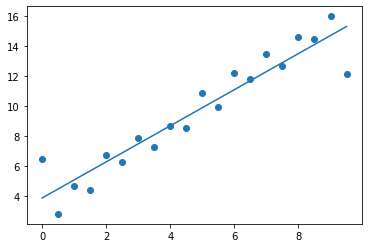

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x ,y)
plt.plot(x, x * 1.1986222162857139 + 3.899228376142858)
plt.show()

Теперь обучите Ridge регрессию из пакета sklearn. Поставьте параметр **Alpha =2**.

Какие коофициенты вы получили ? Как выглядит график прямой ?

In [ ]:
# Преобразим x, чтобы он работал с sklearn.
# Для этого сделаем из него массив, где каждый элемент — массив из одного элемента.
x = x.reshape((-1, 1))
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
r = Ridge(alpha=2.0)
r.fit(x,y)
cross_val_score(r, x, y,cv=3) ,r.coef_, r.intercept_

(array([ 0.24948005,  0.80405241, -0.46517214]),
 array([1.18437411]),
 3.9669068965274867)

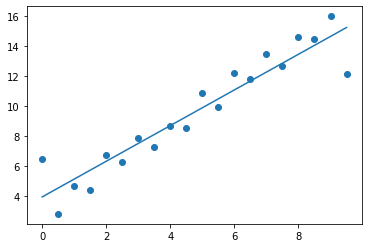

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x ,y)
plt.plot(x, x * 1.18437411+3.9669068965274867)
plt.show()

### Задание 2. Логистическая регрессия на реальных данных

Скачайте датасет data_price.csv

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.



In [ ]:
import pandas as pd

df = pd.read_csv('data_price.csv')

y = df['price_range']

y = (y > 1).astype(int)

X = df.drop(columns=['price_range'])
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

Обучите логистическую регрессию.

Посчитайте значение accuracy, precision, recall, f-меры с помощью кросс-валидации по 5 блокам. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
lr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
cross_val_score(lr,X, y,cv=5, scoring="accuracy").mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8955

In [ ]:
p=cross_val_score(lr,X, y,cv=5, scoring="precision").mean()
p

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8830737279335409

In [ ]:
r=cross_val_score(lr,X, y,cv=5, scoring="recall").mean()
r

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9120000000000001

In [ ]:
f=(2*p*r)/(p+r)
f

0.8973038013346786

Отмасштабируйте выборку с помощью MinMaxScaler.

Посчитайте качество. Улучишлось ли оно ?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x_scaler=scaler.transform(X)
cross_val_score(lr,x_scaler, y,cv=5, scoring="accuracy").mean()

0.9834999999999999

Перебирите параметр-регуляризации C.

При каком C получается наилучший результат f-меры ?

Постройте график для наглядности.



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(LogisticRegression(), {'C': np.arange(0.1, 2, 0.4)}, cv = 5, scoring='f1', verbose=1)

cv.fit(x_scaler, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.5, 0.9, 1.3, 1.7])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [ ]:
cv.best_score_

0.9859469386859037

In [ ]:
cv.best_params_

{'C': 1.7000000000000002}

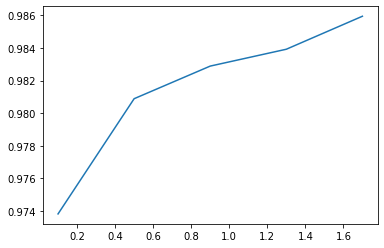

In [ ]:
plt.plot(np.arange(0.1, 2, 0.4), cv.cv_results_["mean_test_score"] )
plt.show()

Какие признаки наиболее влияют на ответ ?

Покажите топ-5 признаков и попробуйте объяснить почему..

In [ ]:
# у них коэффициенты больше, значит они сильнее влияют на ответ
lr = LogisticRegression(C=1.7000000000000002)
lr.fit(x_scaler, y)
a=lr.coef_[0]
abs(a)
for i in range(5):
  print(X.columns[a.argmax()])
  a[a.argmax()]=-1

ram
battery_power
px_height
px_width
n_cores
